## Hate Speech Text Classifier Using TF-IDF
TF-IDF (Term Frequency - Inverse Dense Frequency) measures the importance of each word in each document in the entire corpus. Here, we convert each word in all documents (tweets) to its TF-IDF score and then use the scores to predict whether the tweets are hate speech or not.

In [48]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

Load data from Google Colab or local computer.

In [49]:
# Run from Google Colab
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/Colab/Hate/tweets_malay.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
df.columns = ["text", "label"]
df

,text,label
0,haha babi dia punya tidak menyabar macam ada 1...,1
1,ini namanya pns kontol banyak gaya emosi aing ...,1
2,pukimak punya jantan trick baru dia guna bud...,1
3,pantat apa eh jual karipap inti basi nak menia...,1
4,ini warga emas ke oku le frontliner apa kepent...,1
...,...,...
1855,temen gw banget sudah tau doi nya toxic banget...,0
1856,kau komen lebai la mende la vid lucah pn kau l...,1
1857,pastu kau tahu kain dalam eh babi aku dah paka...,1
1858,sekarang ramai babi dah pandai drive kete atas...,1


In [51]:
df['label'].value_counts()

1    1188
0     672
Name: label, dtype: int64

Transform all words into TF-IDF score.

In [52]:
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df['text'])

X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499,6500,6501
0,0.0,0.0,0.0,0.0,0.0,0.0,0.277985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
X_features.shape

(1860, 6502)

Run a Random Forest classifier.

In [54]:
# Import Random Forest for classification from sklearn
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Import the methods that will be needed to evaluate a basic model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [56]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, df['label'], test_size = 0.2, random_state = 123)

In [57]:
# Fit a basic Random Forest model
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [58]:
# Make predictions on the test set using the fit model
y_pred = rf_model.predict(X_test)

Evaluate the model with accuracy, precision, recall and confusion matrix.

In [59]:
# Evalute model predictions using precision and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Accuracy: {} / Precision: {} / Recall: {}'.format(round(accuracy, 3), round(precision, 3), round(recall, 3)))

Accuracy: 0.728 / Precision: 0.735 / Recall: 0.945


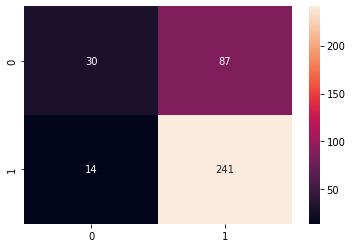

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

Make predictions on new sentences.

In [64]:
sentences = ["kau semua bodoh", "Aku pergi sekolah.", "Anjing aku comel."]

new = tfidf_vect.transform(sentences)
features = pd.DataFrame(new.toarray())

pd.DataFrame({
    'Sentence': sentences,
    'Probability': rf_model.predict_proba(features).tolist(),
    'Prediction': rf_model.predict(features).tolist()
})

,Sentence,Probability,Prediction
0,kau semua bodoh,"[0.02, 0.98]",1
1,Aku pergi sekolah.,"[0.51, 0.49]",0
2,Anjing aku comel.,"[0.5361006493506494, 0.4638993506493507]",0
